In [1]:
import rdkit.Chem as Chem
import rdkit.Chem.Draw.rdMolDraw2D as Draw2D
## image library
import io
import cairosvg
import matplotlib.pyplot as plt

In [2]:
smi = "CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(=O)(=O)C4=CC(=C(C=C4)NC(CCN5CCOCC5)CSC6=CC=CC=C6)S(=O)(=O)C(F)(F)F)C7=CC=C(C=C7)Cl)C"
mol = Chem.MolFromSmiles(smi)

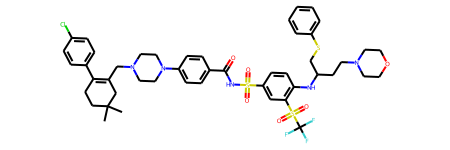

In [3]:
mol

In [4]:
def make_img_by_numpy(mol, width=100, height=100, linewidth=1, rotation=0.):
    mol = Draw2D.PrepareMolForDrawing(mol,
                                      kekulize=True, # default: True
                                      addChiralHs=True, # default: True
                                      wedgeBonds=True, # default: True
                                      forceCoords=False, # default: False
                                     )
    drawer = Draw2D.MolDraw2DSVG(width, height)
    ## custom
    opts = drawer.drawOptions()
    opts.bondLineWidth = linewidth # only integer
    opts.rotate = rotation # float
    ## applying options
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    ## export to svg
    svg = drawer.GetDrawingText()
    ## convert svg to png
    png = cairosvg.svg2png(svg)
    ## convert png to numpy array
    img = plt.imread(io.BytesIO(png))
    return img

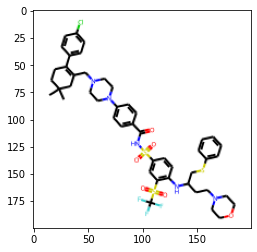

In [5]:
img = make_img_by_numpy(mol, width=200, height=200, linewidth=2, rotation=45)
plt.imshow(img)

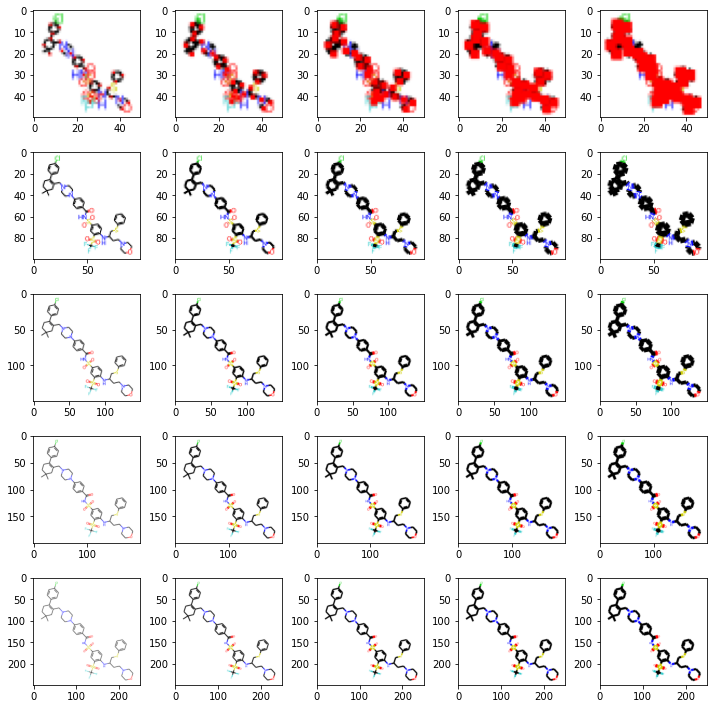

In [6]:
fig, axes = plt.subplots(5,5,figsize=(10,10))

for i in range(25):
    xpos = i%5
    ypos = i//5
    
    ax = axes[xpos,ypos]
    width = height = (1 + xpos) * 50
    linewidth = (1 + ypos) * 1
    
    img = make_img_by_numpy(mol, width, height, linewidth, 45)
    ax.imshow(img)
    #ax.axis('off')
    
plt.tight_layout()
plt.show()